In [3]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [4]:
def rotate_n_times(n):
    qc = QuantumCircuit(1, 1)
    for x in range(0, n):
        qc.h(0)
        qc.t(0)
        qc.h(0)
        qc.t(0)
    
    return qc

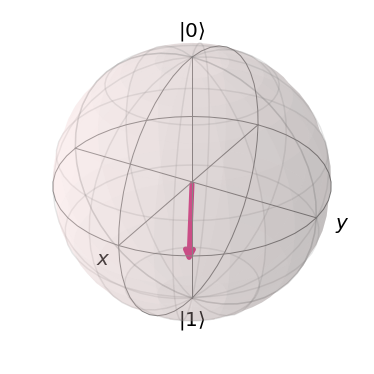

In [15]:
measure_x = QuantumCircuit(1, 1)
measure_x.h(0)
measure_x.measure(0, 0)

measure_y = QuantumCircuit(1, 1)
measure_y.sdg(0)
measure_y.h(0)
measure_y.measure(0, 0)

measure_z = QuantumCircuit(1, 1)
measure_z.measure(0, 0)

qc_1 = rotate_n_times(1)
qc_2 = rotate_n_times(2)
qc_3 = rotate_n_times(3)

shots = 1000000
bloch_vector = []
qc = qc_3;

for circuit in [measure_x, measure_y, measure_z]:
    counts = execute(qc + circuit, Aer.get_backend('qasm_simulator'), shots=shots).result().get_counts()
    
    prob = {}
    for output in ['0', '1']:
        if output in counts:
            prob[output] = counts[output]/shots
        else:
            prob[output] = 0
    
    bloch_vector.append(prob['0'] - prob['1'])
    
plot_bloch_vector(bloch_vector)